# Correctly labelling plots that contain a lot of mathematical formulae

### Not labelling your plot using English is the best way to make your reader’s life as difficult as possible. Don’t make them hunt down the definition of every variable name, just spell out what the plot is saying. This is especially important for plots used in talks.

(FYI the plot is totally made up and completely meaningless, however it inspired by some of those dreadful unintelligible plots you often see in dark matter pheno papers)

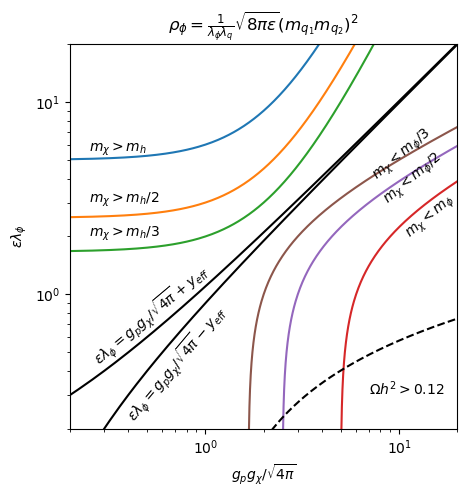

In [3]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

# Make sure to revert to default settings for this example
plt.style.use('default')

# Figure setup
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()

# Data for plot
x = linspace(0.001,20,1000)
line1 = x*1
line2 = x**2+5
line3 = log(x)/4

# Plotting lines
plt.plot(x,line1+0.1,'k-')
plt.plot(x,line1-0.1,'k-')
plt.plot(x,line2,'-')
plt.plot(x,line2/2,'-')
plt.plot(x,line2/3,'-')
plt.plot(line2,x,'-')
plt.plot(line2/2,x,'-')
plt.plot(line2/3,x,'-')
plt.plot(x,line3,'k--')
plt.xlim([0.2,20])
plt.ylim([0.2,20])
plt.yscale('log')
plt.xscale('log')


# Adding labels
plt.text(7,0.3,'$\Omega h^2 > 0.12$')
plt.text(0.25,5.5,r'$m_\chi > m_h$')
plt.text(0.25,3,r'$m_\chi > m_h/2$')
plt.text(0.25,2,r'$m_\chi > m_h/3$')
plt.text(10.5,2,r'$m_\chi < m_\phi$',rotation=40)
plt.text(8,3,r'$m_\chi < m_\phi/2$',rotation=40)
plt.text(7,4,r'$m_\chi < m_\phi/3$',rotation=40)
plt.text(0.25,0.43,'$\epsilon \lambda_\phi = g_p g_\chi/\sqrt{4\pi} + y_{eff}$',rotation=40)
plt.text(0.37,0.22,'$\epsilon \lambda_\phi = g_p g_\chi/\sqrt{4\pi} - y_{eff}$',rotation=50)
plt.xlabel('$g_p g_\chi/\sqrt{4\pi}$')
plt.ylabel('$\epsilon \lambda_\phi$')
plt.title(r'$\rho_\phi = \frac{1}{\lambda_\phi \lambda_q}\sqrt{8 \pi \epsilon} (m_{q_1}m_{q_2})^2$')


plt.savefig('../plots/MathematicalPlot_Bad.pdf',transparent=False,bbox_inches='tight')

# The same plot but improved

### Everything is now labelled, both using the mathematical symbols and in plain english. The inequalities are now shown (correctly) shaded by shading the region in which the inequality applies. Latex fonts are used throughout.

Remember that when rendering text using latex fonts it will take some time to load the first time you run the plot in the notebook. However all subsequent runs will load the saved text from cache and will not take very long. So moving text labels around will not require you waiting for the plot to render for very long, however if you make a change that will force it to render a bunch of new text symbols (e.g. changing the fontsizes of all of your tick marks), then you will have to wait again.

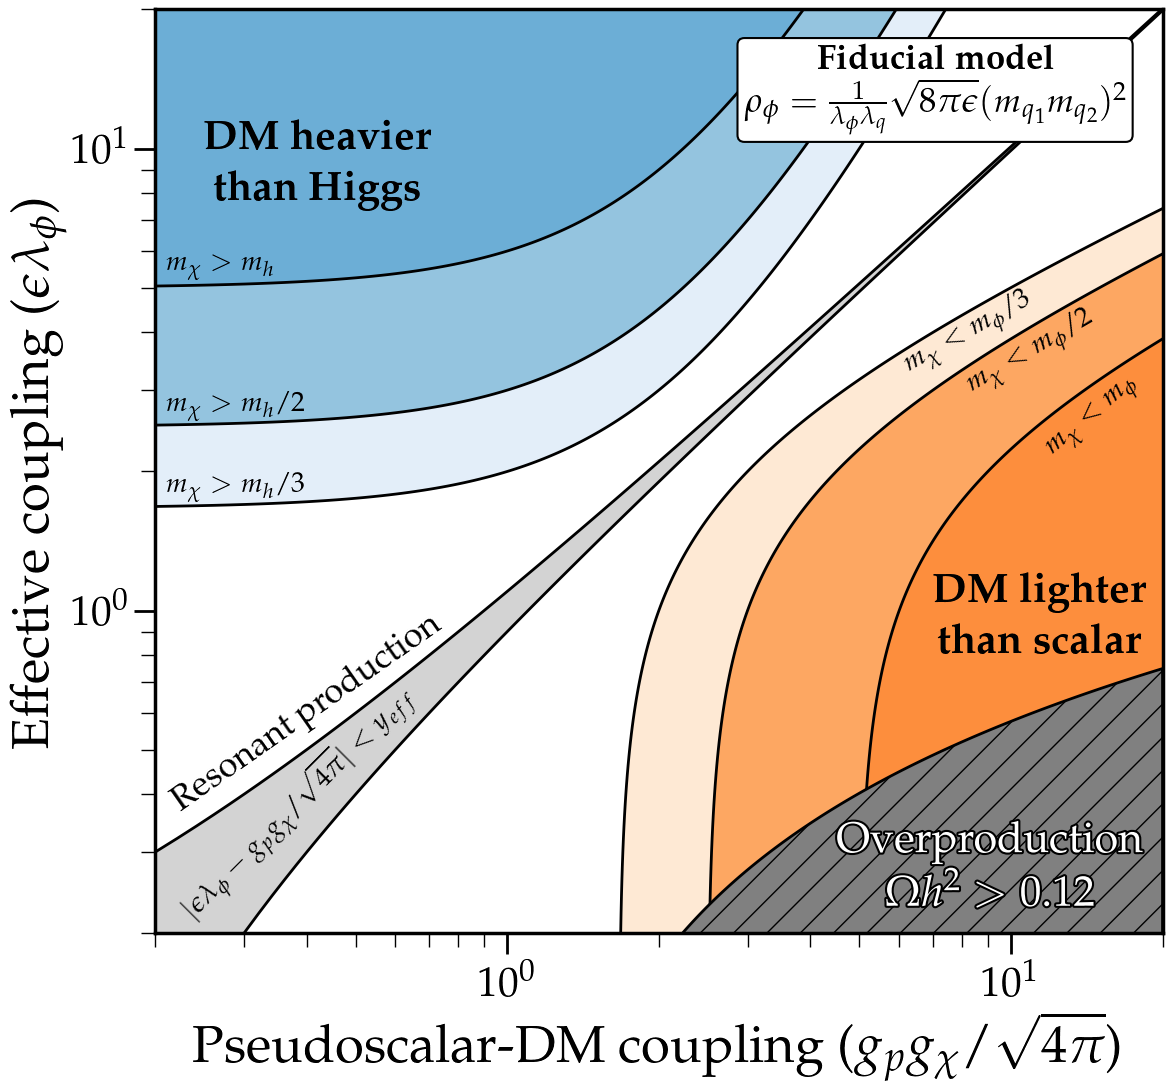

In [4]:
import matplotlib.patheffects as pe
from matplotlib import cm

# Loading the style file
plt.style.use('sty.mplstyle')

fig = plt.figure()
ax = fig.add_subplot()
plt.xlabel('Pseudoscalar-DM coupling ($g_p g_\chi/\sqrt{4\pi}$)',fontsize=38)
plt.ylabel('Effective coupling ($\epsilon \lambda_\phi$)',fontsize=38)


# Define some colorschemes to shade the inequalites
col1 = cm.Blues_r([0.5,0.6,0.9])
col2 = cm.Oranges_r([0.5,0.6,0.9])

# Blue regions
plt.fill_between(x,line1+0.1,y2=line1-0.1,facecolor='lightgray',edgecolor='k',lw=2)
plt.fill_between(x,line2,y2=1e2,facecolor=col1[0,:],edgecolor='k',lw=2,zorder=0)
plt.fill_between(x,line2/2,y2=1e2,facecolor=col1[1,:],edgecolor='k',lw=2,zorder=-1)
plt.fill_between(x,line2/3,y2=1e2,facecolor=col1[2,:],edgecolor='k',lw=2,zorder=-2)

# Orange regions
plt.fill_between(line2,x,y2=1e-2,facecolor=col2[0,:],edgecolor='k',lw=2,zorder=0)
plt.fill_between(line2/2,x,y2=1e-2,facecolor=col2[1,:],edgecolor='k',lw=2,zorder=-1)
plt.fill_between(line2/3,x,y2=1e-2,facecolor=col2[2,:],edgecolor='k',lw=2,zorder=-2)


# Overproduction region
plt.fill_between(x,line3,y2=1e-2,lw=2,hatch='/',facecolor='gray',edgecolor='k')

# Axis scale and range
plt.xlim([0.2,20])
plt.ylim([0.2,20])
plt.yscale('log')
plt.xscale('log')

# Fixing tick parameters to be appropriate for the figure
ax.tick_params(which='both',tickdir='out',top=False,right=False)

# Adding labels
plt.text(4.5,0.3,r'\begin{center} Overproduction \linebreak $\Omega h^2 > 0.12$ \end{center}',\
         color='w',fontsize=31,path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
plt.text(0.21,5.45,r'$m_\chi > m_h$',fontsize=20)
plt.text(0.21,2.7,r'$m_\chi > m_h/2$',fontsize=20)
plt.text(0.21,1.8,r'$m_\chi > m_h/3$',fontsize=20)

plt.text(11.5,2.2,r'$m_\chi < m_\phi$',rotation=40,fontsize=20)
plt.text(8,3,r'$m_\chi < m_\phi/2$',rotation=30,fontsize=20)
plt.text(6.0,3.3,r'$m_\chi < m_\phi/3$',rotation=29,fontsize=20)
plt.text(0.22,0.22,'$|\epsilon \lambda_\phi - g_p g_\chi/\sqrt{4\pi}| < y_{eff}$',rotation=45,fontsize=20)
plt.text(0.21,0.37,'{Resonant production}',rotation=35,fontsize=25)
plt.text(0.25,10,r'\begin{center} {\bf DM heavier \linebreak than Higgs} \end{center}',fontsize=30)
plt.text(7.0,1.05,r'\begin{center} {\bf DM lighter \linebreak than scalar} \end{center}',fontsize=30)


# Axis labels
plt.xlabel('Pseudoscalar-DM coupling ($g_p g_\chi/\sqrt{4\pi}$)',fontsize=38)
plt.ylabel('Effective coupling ($\epsilon \lambda_\phi$)',fontsize=38)


# Adding text box for additional details
plt.gcf().text(0.725, 0.83,r'\begin{center} {\bf Fiducial model} \linebreak {$\rho_\phi = \frac{1}{\lambda_\phi \lambda_q}\sqrt{8 \pi \epsilon} (m_{q_1}m_{q_2})^2$} \end{center}',
               ha='center',color='black',multialignment='center',bbox=dict(facecolor='w', linewidth=1.5,edgecolor='black', boxstyle='round,pad=0.2'),fontsize=25);

plt.savefig('../plots/MathematicalPlot_Good.pdf',transparent=False,bbox_inches='tight')
plt.savefig('../plots/plots_png/MathematicalPlot_Good.png',transparent=False,bbox_inches='tight')